In [3]:
!pip install scikit-image


   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   ------ --------------------------------- 2.1/12.9 MB 13.0 MB/s eta 0:00:01
   ---------------- ----------------------- 5.2/12.9 MB 13.3 MB/s eta 0:00:01
   -------------------------- ------------- 8.4/12.9 MB 13.7 MB/s eta 0:00:01
   ---------------------------------- ----- 11.3/12.9 MB 13.8 MB/s eta 0:00:01
   ---------------------------------------- 12.9/12.9 MB 12.3 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



Running 1D Convolution (A1)...


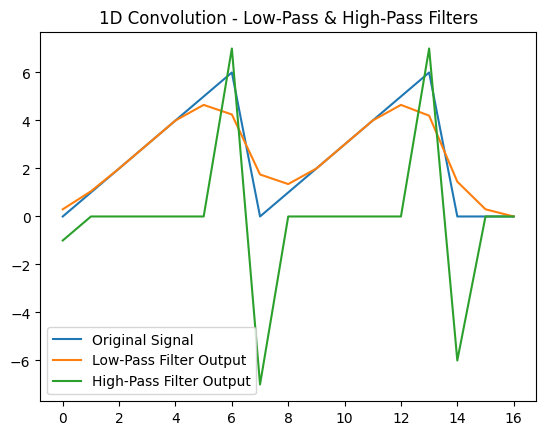


Running 2D Image Convolution (A2)...


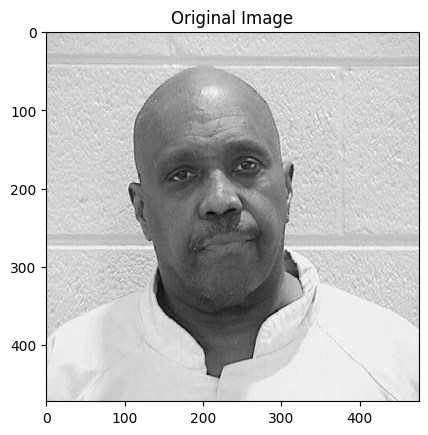

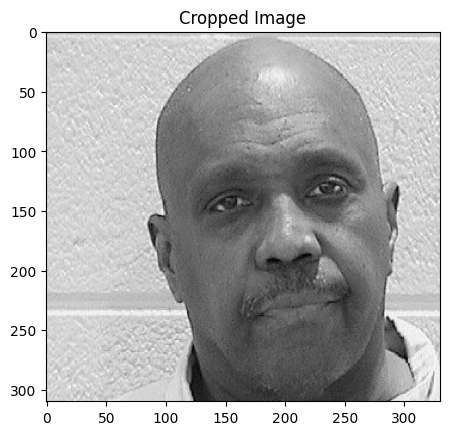

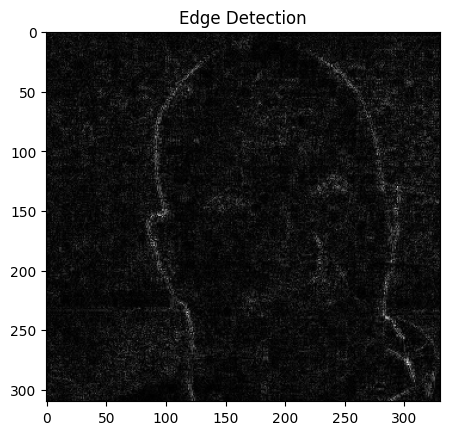

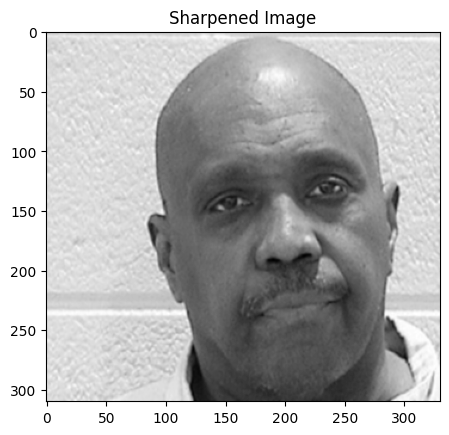

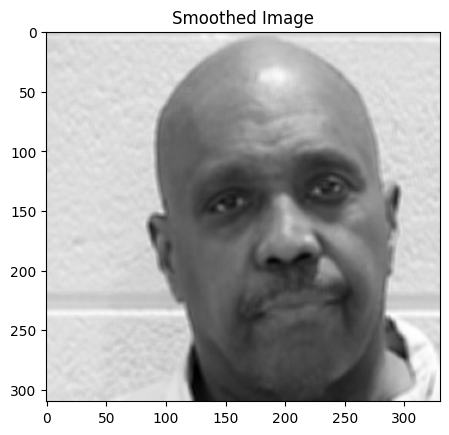


Training MLP for Classification (A3 - A5)...


C:\Users\Admin\myenv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 402ms/step - accuracy: 0.5389 - loss: 0.7183 - val_accuracy: 0.5200 - val_loss: 0.7019
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 327ms/step - accuracy: 0.5416 - loss: 0.6967 - val_accuracy: 0.4800 - val_loss: 0.7255
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 333ms/step - accuracy: 0.4917 - loss: 0.7098 - val_accuracy: 0.5200 - val_loss: 0.6927
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 311ms/step - accuracy: 0.5125 - loss: 0.6948 - val_accuracy: 0.5200 - val_loss: 0.6931
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 307ms/step - accuracy: 0.5324 - loss: 0.7020 - val_accuracy: 0.4800 - val_loss: 0.6997
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 328ms/step - accuracy: 0.5105 - loss: 0.6967 - val_accuracy: 0.4800 - val_loss: 0.6936
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 307ms/step - accuracy: 0.4709 - loss: 0.6961 - val_accuracy: 0.5200 - val_loss: 0.6924
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 308ms/step - accuracy: 0.4427 - loss: 0.6967 - val_accuracy: 0.

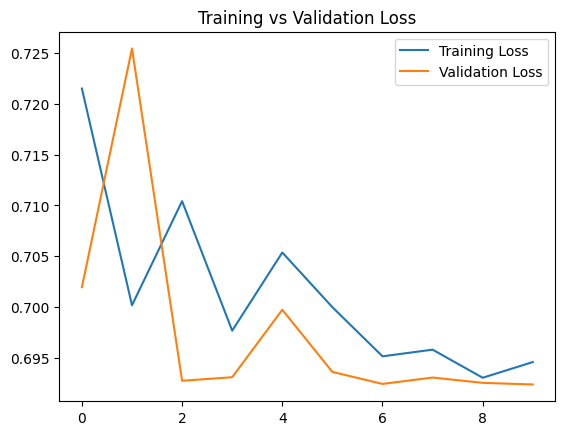

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5497 - loss: 0.6897
Test Accuracy: 0.5200


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from scipy import signal
from skimage.io import imread
from skimage.color import rgb2gray

def apply_1d_convolution():
    X = np.array([0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 0, 0])
    H_L = np.array([0.05, 0.2, 0.5, 0.2, 0.05])
    H_H = np.array([-1, 2, -1])

    y_low = np.convolve(X, H_L, mode='same')
    y_high = np.convolve(X, H_H, mode='same')

    plt.plot(X, label="Original Signal")
    plt.plot(y_low, label="Low-Pass Filter Output")
    plt.plot(y_high, label="High-Pass Filter Output")
    plt.legend()
    plt.title("1D Convolution - Low-Pass & High-Pass Filters")
    plt.show()

def apply_2d_convolution(image_path):
    img = imread(image_path)
    if len(img.shape) == 3 and img.shape[2] == 3:
        img = rgb2gray(img) * 255

    plt.imshow(img, cmap='gray')
    plt.title("Original Image")
    plt.show()

    img1 = img[40:350, 20:350]
    plt.imshow(img1, cmap='gray')
    plt.title("Cropped Image")
    plt.show()

    fil1 = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
    fil2 = np.array([[0.2, 0.5, 0.2], [0.5, 1, 0.5], [0.2, 0.5, 0.2]])
    fil3 = np.ones((5, 5)) / 25

    grad1 = signal.convolve2d(img1, fil1, boundary='symm', mode='same')
    grad2 = signal.convolve2d(img1, fil2, boundary='symm', mode='same')
    grad3 = signal.convolve2d(img1, fil3, boundary='symm', mode='same')

    plt.imshow(np.abs(grad1), cmap='gray')
    plt.title("Edge Detection")
    plt.show()

    plt.imshow(grad2, cmap='gray')
    plt.title("Sharpened Image")
    plt.show()

    plt.imshow(grad3, cmap='gray')
    plt.title("Smoothed Image")
    plt.show()

def train_mlp(image_path):
    img = imread(image_path)
    if len(img.shape) == 3 and img.shape[2] == 3:
        img = rgb2gray(img)

    img = img / 255.0
    img = np.expand_dims(img, axis=-1)
    img = np.expand_dims(img, axis=0)

    datagen = ImageDataGenerator(rotation_range=30, width_shift_range=0.2, height_shift_range=0.2, zoom_range=0.2)
    train_data = np.array([img[0] for _ in range(500)])
    train_labels = np.random.randint(0, 2, 500)

    split = int(0.8 * len(train_data))
    X_train, X_val = train_data[:split], train_data[split:]
    y_train, y_val = train_labels[:split], train_labels[split:]

    model = Sequential([
        Flatten(input_shape=(img.shape[1], img.shape[2])),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(2, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

    plt.plot(history.history['loss'], label="Training Loss")
    plt.plot(history.history['val_loss'], label="Validation Loss")
    plt.legend()
    plt.title("Training vs Validation Loss")
    plt.show()

    test_loss, test_acc = model.evaluate(X_val, y_val)
    print(f"Test Accuracy: {test_acc:.4f}")

def main():
    image_path = r"C:\Users\Admin\Downloads\A00367.jpg"

    print("\nRunning 1D Convolution (A1)...")
    apply_1d_convolution()

    print("\nRunning 2D Image Convolution (A2)...")
    apply_2d_convolution(image_path)

    print("\nTraining MLP for Classification (A3 - A5)...")
    train_mlp(image_path)

if __name__ == "__main__":
    main()
